## Notebook to characterise saliencies in the test cohort

In [1]:
import os
import sys
import numpy as np
sys.path.append('/home/co-ripa1/rds/hpc-work/scripts/meld_classifier')
import h5py
import matplotlib_surface_plotting as msp
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nibabel as nb
import meld_graph.experiment
from meld_classifier.paths import BASE_PATH
from meld_classifier.meld_cohort import MeldCohort,MeldSubject
import ptitprince as pt
import seaborn as sns


Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350
Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data


In [2]:
def load_prediction(subject,hdf5,dset='prediction'):
    results={}
    with h5py.File(hdf5, "r") as f:
        for hemi in ['lh','rh']:
            results[hemi] = f[subject][hemi][dset][:]
    return results


### Compute mean saliencies 

In [3]:
from meld_graph.dataset import GraphDataset
from meld_graph.evaluation import Evaluator
import matplotlib as mpl
import matplotlib.cm as cm
from meld_graph.data_preprocessing import Preprocess
from meld_graph.confidence import get_confidence
import matplotlib_surface_plotting as msp
from meld_classifier.meld_plotting import trim
from PIL import Image


In [4]:
dataset = 'test'  # "test" or "H101"

In [5]:
# load experiment
model_graph = '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all'
exp = meld_graph.experiment.Experiment.from_folder(model_graph)
exp.data_parameters["augment_data"] = {}

#load trainval dataset
split = "test"

cohort = MeldCohort(
        hdf5_file_root=exp.data_parameters["hdf5_file_root"],
        dataset=exp.data_parameters["dataset"],
    )

features = exp.data_parameters["features"]

# get only test patients
with h5py.File(os.path.join(model_graph, 'results_best_model', 'predictions.hdf5'), "r") as f:
    subjects = list(f.keys())

subjects = [subject for subject in subjects if '_FCD_' in subject]
# print(len(subjects))
# subjects = subjects[0:20]
dataset = GraphDataset(subjects, cohort, exp.data_parameters, mode="test")
save_prediction_suffix=""

# create evaluator
eva = Evaluator(
    experiment=exp,
    checkpoint_path=model_graph,
    make_images=False,
    dataset=dataset,
    save_dir=None,
    cohort=cohort,
    subject_ids=subjects,
    mode="test",
    thresh_and_clust=True,
)


Initialised Experiment 23-10-30_LVHZ_dcp/s_0


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all


Loading and preprocessing test data


MELD2_H7_3T_FCD_001


Z-scoring data for MELD2_H7_3T_FCD_001


MELD2_H7_3T_FCD_004


Z-scoring data for MELD2_H7_3T_FCD_004


MELD2_H7_3T_FCD_005


Z-scoring data for MELD2_H7_3T_FCD_005


MELD2_H7_3T_FCD_009


Z-scoring data for MELD2_H7_3T_FCD_009


MELD_H10_3T_FCD_0002


Z-scoring data for MELD_H10_3T_FCD_0002


MELD_H10_3T_FCD_0009


Z-scoring data for MELD_H10_3T_FCD_0009


MELD_H10_3T_FCD_0013


Z-scoring data for MELD_H10_3T_FCD_0013


MELD_H10_3T_FCD_0014


Z-scoring data for MELD_H10_3T_FCD_0014


MELD_H10_3T_FCD_0016


Z-scoring data for MELD_H10_3T_FCD_0016


MELD_H11_3T_FCD_0002


Z-scoring data for MELD_H11_3T_FCD_0002


MELD_H11_3T_FCD_0006


Z-scoring data for MELD_H11_3T_FCD_0006


MELD_H11_3T_FCD_0007


Z-scoring data for MELD_H11_3T_FCD_0007


MELD_H11_3T_FCD_0009


Z-scoring data for MELD_H11_3T_FCD_0009


MELD_H11_3T_FCD_0010


Z-scoring data for MELD_H11_3T_FCD_0010


MELD_H11_3T_FCD_0011


Z-scoring data for MELD_H11_3T_FCD_0011


MELD_H11_3T_FCD_0015


Z-scoring data for MELD_H11_3T_FCD_0015


MELD_H11_3T_FCD_0019


Z-scoring data for MELD_H11_3T_FCD_0019


MELD_H11_3T_FCD_0020


Z-scoring data for MELD_H11_3T_FCD_0020


MELD_H11_3T_FCD_0025


Z-scoring data for MELD_H11_3T_FCD_0025


MELD_H11_3T_FCD_0027


Z-scoring data for MELD_H11_3T_FCD_0027


MELD_H11_3T_FCD_0028


Z-scoring data for MELD_H11_3T_FCD_0028


MELD_H11_3T_FCD_0030


Z-scoring data for MELD_H11_3T_FCD_0030


MELD_H11_3T_FCD_0031


Z-scoring data for MELD_H11_3T_FCD_0031


MELD_H11_3T_FCD_0040


Z-scoring data for MELD_H11_3T_FCD_0040


MELD_H11_3T_FCD_0041


Z-scoring data for MELD_H11_3T_FCD_0041


MELD_H11_3T_FCD_0042


Z-scoring data for MELD_H11_3T_FCD_0042


MELD_H11_3T_FCD_0044


Z-scoring data for MELD_H11_3T_FCD_0044


MELD_H11_3T_FCD_0045


Z-scoring data for MELD_H11_3T_FCD_0045


MELD_H12_3T_FCD_0003


Z-scoring data for MELD_H12_3T_FCD_0003


MELD_H12_3T_FCD_0006


Z-scoring data for MELD_H12_3T_FCD_0006


MELD_H12_3T_FCD_0007


Z-scoring data for MELD_H12_3T_FCD_0007


MELD_H12_3T_FCD_0009


Z-scoring data for MELD_H12_3T_FCD_0009


MELD_H12_3T_FCD_0011


Z-scoring data for MELD_H12_3T_FCD_0011


MELD_H12_3T_FCD_0014


Z-scoring data for MELD_H12_3T_FCD_0014


MELD_H12_3T_FCD_0016


Z-scoring data for MELD_H12_3T_FCD_0016


MELD_H12_3T_FCD_0018


Z-scoring data for MELD_H12_3T_FCD_0018


MELD_H12_3T_FCD_0030


Z-scoring data for MELD_H12_3T_FCD_0030


MELD_H14_3T_FCD_0009


Z-scoring data for MELD_H14_3T_FCD_0009


MELD_H14_3T_FCD_0011


Z-scoring data for MELD_H14_3T_FCD_0011


MELD_H14_3T_FCD_0013


Z-scoring data for MELD_H14_3T_FCD_0013


MELD_H14_3T_FCD_0016


Z-scoring data for MELD_H14_3T_FCD_0016


MELD_H14_3T_FCD_0017


Z-scoring data for MELD_H14_3T_FCD_0017


MELD_H14_3T_FCD_0021


Z-scoring data for MELD_H14_3T_FCD_0021


MELD_H14_3T_FCD_0022


Z-scoring data for MELD_H14_3T_FCD_0022


MELD_H14_3T_FCD_0023


Z-scoring data for MELD_H14_3T_FCD_0023


MELD_H14_3T_FCD_0024


Z-scoring data for MELD_H14_3T_FCD_0024


MELD_H14_3T_FCD_0025


Z-scoring data for MELD_H14_3T_FCD_0025


MELD_H14_3T_FCD_0026


Z-scoring data for MELD_H14_3T_FCD_0026


MELD_H14_3T_FCD_0029


Z-scoring data for MELD_H14_3T_FCD_0029


MELD_H14_3T_FCD_0030


Z-scoring data for MELD_H14_3T_FCD_0030


MELD_H14_3T_FCD_0031


Z-scoring data for MELD_H14_3T_FCD_0031


MELD_H14_3T_FCD_0034


Z-scoring data for MELD_H14_3T_FCD_0034


MELD_H14_3T_FCD_0035


Z-scoring data for MELD_H14_3T_FCD_0035


MELD_H14_3T_FCD_0037


Z-scoring data for MELD_H14_3T_FCD_0037


MELD_H14_3T_FCD_0039


Z-scoring data for MELD_H14_3T_FCD_0039


MELD_H14_3T_FCD_0040


Z-scoring data for MELD_H14_3T_FCD_0040


MELD_H14_3T_FCD_0042


Z-scoring data for MELD_H14_3T_FCD_0042


MELD_H15_3T_FCD_0003


Z-scoring data for MELD_H15_3T_FCD_0003


MELD_H15_3T_FCD_0004


Z-scoring data for MELD_H15_3T_FCD_0004


MELD_H15_3T_FCD_0007


Z-scoring data for MELD_H15_3T_FCD_0007


MELD_H15_3T_FCD_0008


Z-scoring data for MELD_H15_3T_FCD_0008


MELD_H15_3T_FCD_0010


Z-scoring data for MELD_H15_3T_FCD_0010


MELD_H16_3T_FCD_001


Z-scoring data for MELD_H16_3T_FCD_001


MELD_H16_3T_FCD_003


Z-scoring data for MELD_H16_3T_FCD_003


MELD_H16_3T_FCD_004


Z-scoring data for MELD_H16_3T_FCD_004


MELD_H16_3T_FCD_005


Z-scoring data for MELD_H16_3T_FCD_005


MELD_H16_3T_FCD_008


Z-scoring data for MELD_H16_3T_FCD_008


MELD_H16_3T_FCD_010


Z-scoring data for MELD_H16_3T_FCD_010


MELD_H16_3T_FCD_013


Z-scoring data for MELD_H16_3T_FCD_013


MELD_H16_3T_FCD_015


Z-scoring data for MELD_H16_3T_FCD_015


MELD_H16_3T_FCD_016


Z-scoring data for MELD_H16_3T_FCD_016


MELD_H16_3T_FCD_017


Z-scoring data for MELD_H16_3T_FCD_017


MELD_H16_3T_FCD_022


Z-scoring data for MELD_H16_3T_FCD_022


MELD_H16_3T_FCD_023


Z-scoring data for MELD_H16_3T_FCD_023


MELD_H16_3T_FCD_026


Z-scoring data for MELD_H16_3T_FCD_026


MELD_H16_3T_FCD_045


Z-scoring data for MELD_H16_3T_FCD_045


MELD_H16_3T_FCD_048


Z-scoring data for MELD_H16_3T_FCD_048


MELD_H17_15T_FCD_0011


Z-scoring data for MELD_H17_15T_FCD_0011


MELD_H17_15T_FCD_0017


Z-scoring data for MELD_H17_15T_FCD_0017


MELD_H17_15T_FCD_0102


Z-scoring data for MELD_H17_15T_FCD_0102


MELD_H17_15T_FCD_0104


Z-scoring data for MELD_H17_15T_FCD_0104


MELD_H17_15T_FCD_0139


Z-scoring data for MELD_H17_15T_FCD_0139


MELD_H17_3T_FCD_0001


Z-scoring data for MELD_H17_3T_FCD_0001


MELD_H17_3T_FCD_0014


Z-scoring data for MELD_H17_3T_FCD_0014


MELD_H17_3T_FCD_0018


Z-scoring data for MELD_H17_3T_FCD_0018


MELD_H17_3T_FCD_0022


Z-scoring data for MELD_H17_3T_FCD_0022


MELD_H17_3T_FCD_0039


Z-scoring data for MELD_H17_3T_FCD_0039


MELD_H17_3T_FCD_0043


Z-scoring data for MELD_H17_3T_FCD_0043


MELD_H17_3T_FCD_0044


Z-scoring data for MELD_H17_3T_FCD_0044


MELD_H17_3T_FCD_0053


Z-scoring data for MELD_H17_3T_FCD_0053


MELD_H17_3T_FCD_0054


Z-scoring data for MELD_H17_3T_FCD_0054


MELD_H17_3T_FCD_0057


Z-scoring data for MELD_H17_3T_FCD_0057


MELD_H17_3T_FCD_0061


Z-scoring data for MELD_H17_3T_FCD_0061


MELD_H17_3T_FCD_0067


Z-scoring data for MELD_H17_3T_FCD_0067


MELD_H17_3T_FCD_0070


Z-scoring data for MELD_H17_3T_FCD_0070


MELD_H17_3T_FCD_0076


Z-scoring data for MELD_H17_3T_FCD_0076


MELD_H17_3T_FCD_0079


Z-scoring data for MELD_H17_3T_FCD_0079


MELD_H17_3T_FCD_0084


Z-scoring data for MELD_H17_3T_FCD_0084


MELD_H17_3T_FCD_0086


Z-scoring data for MELD_H17_3T_FCD_0086


MELD_H17_3T_FCD_0090


Z-scoring data for MELD_H17_3T_FCD_0090


MELD_H17_3T_FCD_0091


Z-scoring data for MELD_H17_3T_FCD_0091


MELD_H17_3T_FCD_0094


Z-scoring data for MELD_H17_3T_FCD_0094


MELD_H17_3T_FCD_0098


Z-scoring data for MELD_H17_3T_FCD_0098


MELD_H17_3T_FCD_0112


Z-scoring data for MELD_H17_3T_FCD_0112


MELD_H17_3T_FCD_0116


Z-scoring data for MELD_H17_3T_FCD_0116


MELD_H17_3T_FCD_0120


Z-scoring data for MELD_H17_3T_FCD_0120


MELD_H17_3T_FCD_0127


Z-scoring data for MELD_H17_3T_FCD_0127


MELD_H17_3T_FCD_0135


Z-scoring data for MELD_H17_3T_FCD_0135


MELD_H17_3T_FCD_0143


Z-scoring data for MELD_H17_3T_FCD_0143


MELD_H18_3T_FCD_0001


Z-scoring data for MELD_H18_3T_FCD_0001


MELD_H18_3T_FCD_0006


Z-scoring data for MELD_H18_3T_FCD_0006


MELD_H18_3T_FCD_0008


Z-scoring data for MELD_H18_3T_FCD_0008


MELD_H18_3T_FCD_0009


Z-scoring data for MELD_H18_3T_FCD_0009


MELD_H18_3T_FCD_0101


Z-scoring data for MELD_H18_3T_FCD_0101


MELD_H18_3T_FCD_0109


Z-scoring data for MELD_H18_3T_FCD_0109


MELD_H18_3T_FCD_0115


Z-scoring data for MELD_H18_3T_FCD_0115


MELD_H18_3T_FCD_0124


Z-scoring data for MELD_H18_3T_FCD_0124


MELD_H21_15T_FCD_0036


Z-scoring data for MELD_H21_15T_FCD_0036


MELD_H21_15T_FCD_0038


Z-scoring data for MELD_H21_15T_FCD_0038


MELD_H21_15T_FCD_0040


Z-scoring data for MELD_H21_15T_FCD_0040


MELD_H21_15T_FCD_0043


Z-scoring data for MELD_H21_15T_FCD_0043


MELD_H21_15T_FCD_0047


Z-scoring data for MELD_H21_15T_FCD_0047


MELD_H21_15T_FCD_0049


Z-scoring data for MELD_H21_15T_FCD_0049


MELD_H21_15T_FCD_0050


Z-scoring data for MELD_H21_15T_FCD_0050


MELD_H21_15T_FCD_0051


Z-scoring data for MELD_H21_15T_FCD_0051


MELD_H21_15T_FCD_0052


Z-scoring data for MELD_H21_15T_FCD_0052


MELD_H21_3T_FCD_0007


Z-scoring data for MELD_H21_3T_FCD_0007


MELD_H21_3T_FCD_0008


Z-scoring data for MELD_H21_3T_FCD_0008


MELD_H21_3T_FCD_0009


Z-scoring data for MELD_H21_3T_FCD_0009


MELD_H21_3T_FCD_0013


Z-scoring data for MELD_H21_3T_FCD_0013


MELD_H21_3T_FCD_0016


Z-scoring data for MELD_H21_3T_FCD_0016


MELD_H21_3T_FCD_0017


Z-scoring data for MELD_H21_3T_FCD_0017


MELD_H21_3T_FCD_0018


Z-scoring data for MELD_H21_3T_FCD_0018


MELD_H21_3T_FCD_0030


Z-scoring data for MELD_H21_3T_FCD_0030


MELD_H21_3T_FCD_0033


Z-scoring data for MELD_H21_3T_FCD_0033


MELD_H21_3T_FCD_0034


Z-scoring data for MELD_H21_3T_FCD_0034


MELD_H21_3T_FCD_0035


Z-scoring data for MELD_H21_3T_FCD_0035


MELD_H21_3T_FCD_0046


Z-scoring data for MELD_H21_3T_FCD_0046


MELD_H21_3T_FCD_0048


Z-scoring data for MELD_H21_3T_FCD_0048


MELD_H23_15T_FCD_0003


Z-scoring data for MELD_H23_15T_FCD_0003


MELD_H23_15T_FCD_0004


Z-scoring data for MELD_H23_15T_FCD_0004


MELD_H23_15T_FCD_0005


Z-scoring data for MELD_H23_15T_FCD_0005


MELD_H23_15T_FCD_0011


Z-scoring data for MELD_H23_15T_FCD_0011


MELD_H23_15T_FCD_0013


Z-scoring data for MELD_H23_15T_FCD_0013


MELD_H23_15T_FCD_0015


Z-scoring data for MELD_H23_15T_FCD_0015


MELD_H23_15T_FCD_0020


Z-scoring data for MELD_H23_15T_FCD_0020


MELD_H23_15T_FCD_0021


Z-scoring data for MELD_H23_15T_FCD_0021


MELD_H23_15T_FCD_0022


Z-scoring data for MELD_H23_15T_FCD_0022


MELD_H23_15T_FCD_0023


Z-scoring data for MELD_H23_15T_FCD_0023


MELD_H23_15T_FCD_0025


Z-scoring data for MELD_H23_15T_FCD_0025


MELD_H23_15T_FCD_0027


Z-scoring data for MELD_H23_15T_FCD_0027


MELD_H23_15T_FCD_0030


Z-scoring data for MELD_H23_15T_FCD_0030


MELD_H23_15T_FCD_0031


Z-scoring data for MELD_H23_15T_FCD_0031


MELD_H23_15T_FCD_0032


Z-scoring data for MELD_H23_15T_FCD_0032


MELD_H24_3T_FCD_0003


Z-scoring data for MELD_H24_3T_FCD_0003


MELD_H24_3T_FCD_0005


Z-scoring data for MELD_H24_3T_FCD_0005


MELD_H24_3T_FCD_0006


Z-scoring data for MELD_H24_3T_FCD_0006


MELD_H24_3T_FCD_0007


Z-scoring data for MELD_H24_3T_FCD_0007


MELD_H24_3T_FCD_0011


Z-scoring data for MELD_H24_3T_FCD_0011


MELD_H24_3T_FCD_0012


Z-scoring data for MELD_H24_3T_FCD_0012


MELD_H24_3T_FCD_0013


Z-scoring data for MELD_H24_3T_FCD_0013


MELD_H24_3T_FCD_0015


Z-scoring data for MELD_H24_3T_FCD_0015


MELD_H24_3T_FCD_0025


Z-scoring data for MELD_H24_3T_FCD_0025


MELD_H24_3T_FCD_0026


Z-scoring data for MELD_H24_3T_FCD_0026


MELD_H24_3T_FCD_0029


Z-scoring data for MELD_H24_3T_FCD_0029


MELD_H24_3T_FCD_0030


Z-scoring data for MELD_H24_3T_FCD_0030


MELD_H24_3T_FCD_0036


Z-scoring data for MELD_H24_3T_FCD_0036


MELD_H24_3T_FCD_0037


Z-scoring data for MELD_H24_3T_FCD_0037


MELD_H24_3T_FCD_0040


Z-scoring data for MELD_H24_3T_FCD_0040


MELD_H24_3T_FCD_0041


Z-scoring data for MELD_H24_3T_FCD_0041


MELD_H26_15T_FCD_0001


Z-scoring data for MELD_H26_15T_FCD_0001


MELD_H26_15T_FCD_0005


Z-scoring data for MELD_H26_15T_FCD_0005


MELD_H26_15T_FCD_0009


Z-scoring data for MELD_H26_15T_FCD_0009


MELD_H26_15T_FCD_0010


Z-scoring data for MELD_H26_15T_FCD_0010


MELD_H26_3T_FCD_0002


Z-scoring data for MELD_H26_3T_FCD_0002


MELD_H26_3T_FCD_0004


Z-scoring data for MELD_H26_3T_FCD_0004


MELD_H26_3T_FCD_0007


Z-scoring data for MELD_H26_3T_FCD_0007


MELD_H2_15T_FCD_0001


Z-scoring data for MELD_H2_15T_FCD_0001


MELD_H2_15T_FCD_0003


Z-scoring data for MELD_H2_15T_FCD_0003


MELD_H2_15T_FCD_0005


Z-scoring data for MELD_H2_15T_FCD_0005


MELD_H2_15T_FCD_0007


Z-scoring data for MELD_H2_15T_FCD_0007


MELD_H2_15T_FCD_0008


Z-scoring data for MELD_H2_15T_FCD_0008


MELD_H2_15T_FCD_0009


Z-scoring data for MELD_H2_15T_FCD_0009


MELD_H2_15T_FCD_0014


Z-scoring data for MELD_H2_15T_FCD_0014


MELD_H2_15T_FCD_0015


Z-scoring data for MELD_H2_15T_FCD_0015


MELD_H2_15T_FCD_0016


Z-scoring data for MELD_H2_15T_FCD_0016


MELD_H2_15T_FCD_0020


Z-scoring data for MELD_H2_15T_FCD_0020


MELD_H2_15T_FCD_0023


Z-scoring data for MELD_H2_15T_FCD_0023


MELD_H2_15T_FCD_0028


Z-scoring data for MELD_H2_15T_FCD_0028


MELD_H2_15T_FCD_0029


Z-scoring data for MELD_H2_15T_FCD_0029


MELD_H2_15T_FCD_0030


Z-scoring data for MELD_H2_15T_FCD_0030


MELD_H2_3T_FCD_0003


Z-scoring data for MELD_H2_3T_FCD_0003


MELD_H2_3T_FCD_0004


Z-scoring data for MELD_H2_3T_FCD_0004


MELD_H2_3T_FCD_0005


Z-scoring data for MELD_H2_3T_FCD_0005


MELD_H2_3T_FCD_0006


Z-scoring data for MELD_H2_3T_FCD_0006


MELD_H2_3T_FCD_0008


Z-scoring data for MELD_H2_3T_FCD_0008


MELD_H2_3T_FCD_0014


Z-scoring data for MELD_H2_3T_FCD_0014


MELD_H2_3T_FCD_0016


Z-scoring data for MELD_H2_3T_FCD_0016


MELD_H2_3T_FCD_0017


Z-scoring data for MELD_H2_3T_FCD_0017


MELD_H2_3T_FCD_0018


Z-scoring data for MELD_H2_3T_FCD_0018


MELD_H3_3T_FCD_0002


Z-scoring data for MELD_H3_3T_FCD_0002


MELD_H3_3T_FCD_0003


Z-scoring data for MELD_H3_3T_FCD_0003


MELD_H3_3T_FCD_0004


Z-scoring data for MELD_H3_3T_FCD_0004


MELD_H3_3T_FCD_0005


Z-scoring data for MELD_H3_3T_FCD_0005


MELD_H3_3T_FCD_0007


Z-scoring data for MELD_H3_3T_FCD_0007


MELD_H3_3T_FCD_0008


Z-scoring data for MELD_H3_3T_FCD_0008


MELD_H3_3T_FCD_0009


Z-scoring data for MELD_H3_3T_FCD_0009


MELD_H3_3T_FCD_0010


Z-scoring data for MELD_H3_3T_FCD_0010


MELD_H3_3T_FCD_0012


Z-scoring data for MELD_H3_3T_FCD_0012


MELD_H3_3T_FCD_0014


Z-scoring data for MELD_H3_3T_FCD_0014


MELD_H3_3T_FCD_0015


Z-scoring data for MELD_H3_3T_FCD_0015


MELD_H3_3T_FCD_0016


Z-scoring data for MELD_H3_3T_FCD_0016


MELD_H3_3T_FCD_0018


Z-scoring data for MELD_H3_3T_FCD_0018


MELD_H3_3T_FCD_0020


Z-scoring data for MELD_H3_3T_FCD_0020


MELD_H3_3T_FCD_0022


Z-scoring data for MELD_H3_3T_FCD_0022


MELD_H3_3T_FCD_0023


Z-scoring data for MELD_H3_3T_FCD_0023


MELD_H4_15T_FCD_0002


Z-scoring data for MELD_H4_15T_FCD_0002


MELD_H4_15T_FCD_0003


Z-scoring data for MELD_H4_15T_FCD_0003


MELD_H4_15T_FCD_0009


Z-scoring data for MELD_H4_15T_FCD_0009


MELD_H4_15T_FCD_0016


Z-scoring data for MELD_H4_15T_FCD_0016


MELD_H4_15T_FCD_0017


Z-scoring data for MELD_H4_15T_FCD_0017


MELD_H4_15T_FCD_0018


Z-scoring data for MELD_H4_15T_FCD_0018


MELD_H4_15T_FCD_0019


Z-scoring data for MELD_H4_15T_FCD_0019


MELD_H4_15T_FCD_0020


Z-scoring data for MELD_H4_15T_FCD_0020


MELD_H4_15T_FCD_0021


Z-scoring data for MELD_H4_15T_FCD_0021


MELD_H4_3T_FCD_0002


Z-scoring data for MELD_H4_3T_FCD_0002


MELD_H4_3T_FCD_0005


Z-scoring data for MELD_H4_3T_FCD_0005


MELD_H4_3T_FCD_0007


Z-scoring data for MELD_H4_3T_FCD_0007


MELD_H4_3T_FCD_0009


Z-scoring data for MELD_H4_3T_FCD_0009


MELD_H4_3T_FCD_0010


Z-scoring data for MELD_H4_3T_FCD_0010


MELD_H4_3T_FCD_0015


Z-scoring data for MELD_H4_3T_FCD_0015


MELD_H4_3T_FCD_0016


Z-scoring data for MELD_H4_3T_FCD_0016


MELD_H4_3T_FCD_0031


Z-scoring data for MELD_H4_3T_FCD_0031


MELD_H4_3T_FCD_0038


Z-scoring data for MELD_H4_3T_FCD_0038


MELD_H4_3T_FCD_0040


Z-scoring data for MELD_H4_3T_FCD_0040


MELD_H5_3T_FCD_0001


Z-scoring data for MELD_H5_3T_FCD_0001


MELD_H5_3T_FCD_0004


Z-scoring data for MELD_H5_3T_FCD_0004


MELD_H5_3T_FCD_0005


Z-scoring data for MELD_H5_3T_FCD_0005


MELD_H5_3T_FCD_0007


Z-scoring data for MELD_H5_3T_FCD_0007


MELD_H5_3T_FCD_0011


Z-scoring data for MELD_H5_3T_FCD_0011


MELD_H5_3T_FCD_0014


Z-scoring data for MELD_H5_3T_FCD_0014


MELD_H5_3T_FCD_0015


Z-scoring data for MELD_H5_3T_FCD_0015


MELD_H5_3T_FCD_0017


Z-scoring data for MELD_H5_3T_FCD_0017


MELD_H5_3T_FCD_0020


Z-scoring data for MELD_H5_3T_FCD_0020


MELD_H5_3T_FCD_0021


Z-scoring data for MELD_H5_3T_FCD_0021


MELD_H5_3T_FCD_0022


Z-scoring data for MELD_H5_3T_FCD_0022


MELD_H5_3T_FCD_0024


Z-scoring data for MELD_H5_3T_FCD_0024


MELD_H5_3T_FCD_0026


Z-scoring data for MELD_H5_3T_FCD_0026


MELD_H5_3T_FCD_0029


Z-scoring data for MELD_H5_3T_FCD_0029


MELD_H6_3T_FCD_0004


Z-scoring data for MELD_H6_3T_FCD_0004


MELD_H6_3T_FCD_0005


Z-scoring data for MELD_H6_3T_FCD_0005


MELD_H6_3T_FCD_0006


Z-scoring data for MELD_H6_3T_FCD_0006


MELD_H6_3T_FCD_0009


Z-scoring data for MELD_H6_3T_FCD_0009


MELD_H6_3T_FCD_0011


Z-scoring data for MELD_H6_3T_FCD_0011


MELD_H6_3T_FCD_0013


Z-scoring data for MELD_H6_3T_FCD_0013


MELD_H6_3T_FCD_0017


Z-scoring data for MELD_H6_3T_FCD_0017


MELD_H9_3T_FCD_0003


Z-scoring data for MELD_H9_3T_FCD_0003


MELD_H9_3T_FCD_0004


Z-scoring data for MELD_H9_3T_FCD_0004


MELD_H9_3T_FCD_0005


Z-scoring data for MELD_H9_3T_FCD_0005


MELD_H9_3T_FCD_0010


Z-scoring data for MELD_H9_3T_FCD_0010
Evaluation test, min area threshold=100, threshold two_threshold(ymin=0.01, ymax=0.5)
Creating model
Creating ensemble model
Loading ensemble model weights from checkpoint /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all/best_model.pt
Predicting model without dropout


using dataset


In [22]:
# # calculate saliencies if does not exists
# eva.calculate_saliency(save_prediction_suffix="")

calculating saliency
Loading and preprocessing test data
Z-scoring data for MELD_H101_3T_FCD_00068
calculating saliency for MELD_H101_3T_FCD_00068, cluster 1.0
/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/captum/attr/_utils/batching.py:45: UserWarning: Internal batch size cannot be less than the number of input examples. Defaulting to internal batch size of 163842 equal to the number of examples.
  warnings.warn(
saving saliencies_1.0 for MELD_H101_3T_FCD_00068
saving mask_salient_1.0 for MELD_H101_3T_FCD_00068
saving cluster_thresholded_salient for MELD_H101_3T_FCD_00068


In [6]:
 # setup parameters
base_feature_sets = [
    ".on_lh.curv.sm3.mgh",
    ".on_lh.pial.K_filtered.sm20.mgh",
    ".on_lh.sulc.sm3.mgh",
    ".on_lh.thickness_regression.sm3.mgh",
    ".on_lh.w-g.pct.sm3.mgh",
    ".on_lh.gm_FLAIR_0.5.sm3.mgh",
    ".on_lh.wm_FLAIR_1.sm3.mgh",
]

feature_names_sets = {
   ".on_lh.gm_FLAIR_0.5.sm3.mgh": "GM FLAIR (50%)",
    ".on_lh.wm_FLAIR_1.sm3.mgh": "WM FLAIR (1mm)",
    ".on_lh.curv.sm3.mgh": "Mean curvature",
    ".on_lh.pial.K_filtered.sm20.mgh" :"Intrinsic Curvature",
    ".on_lh.sulc.sm3.mgh": "Sulcal depth",
    ".on_lh.thickness_regression.sm3.mgh":"Cortical thickness",
    ".on_lh.w-g.pct.sm3.mgh": "Grey-white contrast"}

In [7]:
import pandas as pd 

eva.dropout_suffix = ""
NVERT=293804

df_salient = pd.DataFrame()
values={}
for subject_id in subjects:
    subject = MeldSubject(subject_id, cohort=cohort)
    values['ID'] = subject_id
    values['group'] = True if '_FCD_' in subject_id else False
    values['histology'] = subject.get_demographic_features(["Histology"])[0]
    # initialise parameter for plot
    if subject.has_flair:
        base_features = base_feature_sets
    else:
        base_features = base_feature_sets[2:]
    # load predictions and data subject
    data_dictionary = eva.load_data_from_file(subject_id, keys=['result','cluster_thresholded','input_features'], 
                                          split_hemis=True, )
    # print(data_dictionary)
    features_vals = data_dictionary['input_features']
    predictions = data_dictionary['cluster_thresholded']
    
    labels_hemis={}
    dists={}
    list_clust={}
    saliencies={}
     # Loop over hemi
    for i, hemi in enumerate(["left", "right"]):
        list_clust[hemi] = set(predictions[hemi])
        list_clust[hemi].remove(0.0)
        #get borderzone
        hemi_bis = 'lh' if hemi=='left' else 'rh'
        dists[hemi], labels_hemis[hemi] = subject.load_feature_lesion_data(
                    features=['.on_lh.boundary_zone.mgh'], hemi=hemi_bis, features_to_ignore=[]
                )
        if np.sum(dists[hemi])==0:
            dists[hemi] +=200
        borderzones = np.zeros(len(dists[hemi]))
        borderzones[cohort.cortex_mask] = dists[hemi].ravel()[cohort.cortex_mask]<20
        # get saliencies
        keys = [f'saliencies_{cl}' for cl in list_clust[hemi]] + [f'mask_salient_{cl}' for cl in list_clust[hemi]]
        saliencies.update(eva.load_data_from_file(subject_id, 
                                            keys=keys, 
                                            split_hemis=True))
        # initiate params for saliencies
        prefixes = [".combat", ".inter_z.intra_z.combat", ".inter_z.asym.intra_z.combat"]
        labels = ["Harmonised", "Normalised", "Asymmetry"]
        # loop over clusters
        for cluster in list_clust[hemi]:
            values['cluster'] = cluster
            # get saliency cluster
            saliencies_cl = saliencies[f'saliencies_{cluster}'][hemi]
            saliencies_cl = saliencies_cl * (NVERT/2)
            # get salient vertices
            mask_salient = saliencies[f'mask_salient_{cluster}'][hemi].astype(bool)
            if ((predictions[hemi]==cluster)&(borderzones.astype(bool))).any():
                values['detected'] = True
            else:
                values['detected'] = False
            # for each feature
            for pr, prefix in enumerate(prefixes):
                values['preprocessing'] = prefix
                for b, bf in enumerate(base_features):
                    values['feature'] = bf
                    values[f'feature_mean'] = np.mean(
                        np.array(features_vals[hemi][mask_salient, features.index(prefix + bf)])
                    )
                    values[f'feature_err'] = np.std(
                        np.array(features_vals[hemi][mask_salient, features.index(prefix + bf)])
                    )
                    values[f'saliency'] = np.mean(
                        saliencies_cl[mask_salient ,features.index(prefix + bf)]
                        )
                    df_salient = pd.concat([df_salient, pd.DataFrame([values])])
        # for lesion mask
        if labels_hemis[hemi].sum()!=0:
            mask = labels_hemis[hemi].astype(bool)
            values['cluster'] = 'lesion_mask'
            if ((predictions[hemi]==cluster)&(borderzones.astype(bool))).any():
                values['detected'] = True
            else:
                values['detected'] = False
            # for each feature
            for pr, prefix in enumerate(prefixes):
                values['preprocessing'] = prefix
                for b, bf in enumerate(base_features):
                    values['feature'] = bf
                    values[f'feature_mean'] = np.mean(
                        np.array(features_vals[hemi][mask, features.index(prefix + bf)])
                    )
                    values[f'feature_err'] = np.std(
                        np.array(features_vals[hemi][mask, features.index(prefix + bf)])
                    )
                    values[f'saliency'] = np.nan
                    df_salient = pd.concat([df_salient, pd.DataFrame([values])])
                
df_salient.head()

Loading and preprocessing test data


MELD2_H7_3T_FCD_001


Z-scoring data for MELD2_H7_3T_FCD_001
Loading and preprocessing test data


MELD2_H7_3T_FCD_004


Z-scoring data for MELD2_H7_3T_FCD_004
Loading and preprocessing test data


MELD2_H7_3T_FCD_005


Z-scoring data for MELD2_H7_3T_FCD_005
Loading and preprocessing test data


MELD2_H7_3T_FCD_009


Z-scoring data for MELD2_H7_3T_FCD_009
Loading and preprocessing test data


MELD_H10_3T_FCD_0002


Z-scoring data for MELD_H10_3T_FCD_0002
Loading and preprocessing test data


MELD_H10_3T_FCD_0009


Z-scoring data for MELD_H10_3T_FCD_0009
Loading and preprocessing test data


MELD_H10_3T_FCD_0013


Z-scoring data for MELD_H10_3T_FCD_0013
Loading and preprocessing test data


MELD_H10_3T_FCD_0014


Z-scoring data for MELD_H10_3T_FCD_0014
Loading and preprocessing test data


MELD_H10_3T_FCD_0016


Z-scoring data for MELD_H10_3T_FCD_0016
Loading and preprocessing test data


MELD_H11_3T_FCD_0002


Z-scoring data for MELD_H11_3T_FCD_0002
Loading and preprocessing test data


MELD_H11_3T_FCD_0006


Z-scoring data for MELD_H11_3T_FCD_0006
Loading and preprocessing test data


MELD_H11_3T_FCD_0007


Z-scoring data for MELD_H11_3T_FCD_0007
Loading and preprocessing test data


MELD_H11_3T_FCD_0009


Z-scoring data for MELD_H11_3T_FCD_0009
Loading and preprocessing test data


MELD_H11_3T_FCD_0010


Z-scoring data for MELD_H11_3T_FCD_0010
Loading and preprocessing test data


MELD_H11_3T_FCD_0011


Z-scoring data for MELD_H11_3T_FCD_0011
Loading and preprocessing test data


MELD_H11_3T_FCD_0015


Z-scoring data for MELD_H11_3T_FCD_0015
Loading and preprocessing test data


MELD_H11_3T_FCD_0019


Z-scoring data for MELD_H11_3T_FCD_0019
Loading and preprocessing test data


MELD_H11_3T_FCD_0020


Z-scoring data for MELD_H11_3T_FCD_0020
Loading and preprocessing test data


MELD_H11_3T_FCD_0025


Z-scoring data for MELD_H11_3T_FCD_0025
Loading and preprocessing test data


MELD_H11_3T_FCD_0027


Z-scoring data for MELD_H11_3T_FCD_0027
Loading and preprocessing test data


MELD_H11_3T_FCD_0028


Z-scoring data for MELD_H11_3T_FCD_0028
Loading and preprocessing test data


MELD_H11_3T_FCD_0030


Z-scoring data for MELD_H11_3T_FCD_0030
Loading and preprocessing test data


MELD_H11_3T_FCD_0031


Z-scoring data for MELD_H11_3T_FCD_0031
Loading and preprocessing test data


MELD_H11_3T_FCD_0040


Z-scoring data for MELD_H11_3T_FCD_0040
Loading and preprocessing test data


MELD_H11_3T_FCD_0041


Z-scoring data for MELD_H11_3T_FCD_0041
Loading and preprocessing test data


MELD_H11_3T_FCD_0042


Z-scoring data for MELD_H11_3T_FCD_0042
Loading and preprocessing test data


MELD_H11_3T_FCD_0044


Z-scoring data for MELD_H11_3T_FCD_0044
Loading and preprocessing test data


MELD_H11_3T_FCD_0045


Z-scoring data for MELD_H11_3T_FCD_0045
Loading and preprocessing test data


MELD_H12_3T_FCD_0003


Z-scoring data for MELD_H12_3T_FCD_0003
Loading and preprocessing test data


MELD_H12_3T_FCD_0006


Z-scoring data for MELD_H12_3T_FCD_0006
Loading and preprocessing test data


MELD_H12_3T_FCD_0007


Z-scoring data for MELD_H12_3T_FCD_0007
Loading and preprocessing test data


MELD_H12_3T_FCD_0009


Z-scoring data for MELD_H12_3T_FCD_0009
Loading and preprocessing test data


MELD_H12_3T_FCD_0011


Z-scoring data for MELD_H12_3T_FCD_0011
Loading and preprocessing test data


MELD_H12_3T_FCD_0014


Z-scoring data for MELD_H12_3T_FCD_0014
Loading and preprocessing test data


MELD_H12_3T_FCD_0016


Z-scoring data for MELD_H12_3T_FCD_0016
Loading and preprocessing test data


MELD_H12_3T_FCD_0018


Z-scoring data for MELD_H12_3T_FCD_0018
Loading and preprocessing test data


MELD_H12_3T_FCD_0030


Z-scoring data for MELD_H12_3T_FCD_0030
Loading and preprocessing test data


MELD_H14_3T_FCD_0009


Z-scoring data for MELD_H14_3T_FCD_0009
Loading and preprocessing test data


MELD_H14_3T_FCD_0011


Z-scoring data for MELD_H14_3T_FCD_0011
Loading and preprocessing test data


MELD_H14_3T_FCD_0013


Z-scoring data for MELD_H14_3T_FCD_0013
Loading and preprocessing test data


MELD_H14_3T_FCD_0016


Z-scoring data for MELD_H14_3T_FCD_0016
Loading and preprocessing test data


MELD_H14_3T_FCD_0017


Z-scoring data for MELD_H14_3T_FCD_0017
Loading and preprocessing test data


MELD_H14_3T_FCD_0021


Z-scoring data for MELD_H14_3T_FCD_0021
Loading and preprocessing test data


MELD_H14_3T_FCD_0022


Z-scoring data for MELD_H14_3T_FCD_0022
Loading and preprocessing test data


MELD_H14_3T_FCD_0023


Z-scoring data for MELD_H14_3T_FCD_0023
Loading and preprocessing test data


MELD_H14_3T_FCD_0024


Z-scoring data for MELD_H14_3T_FCD_0024
Loading and preprocessing test data


MELD_H14_3T_FCD_0025


Z-scoring data for MELD_H14_3T_FCD_0025
Loading and preprocessing test data


MELD_H14_3T_FCD_0026


Z-scoring data for MELD_H14_3T_FCD_0026
Loading and preprocessing test data


MELD_H14_3T_FCD_0029


Z-scoring data for MELD_H14_3T_FCD_0029
Loading and preprocessing test data


MELD_H14_3T_FCD_0030


Z-scoring data for MELD_H14_3T_FCD_0030
Loading and preprocessing test data


MELD_H14_3T_FCD_0031


Z-scoring data for MELD_H14_3T_FCD_0031
Loading and preprocessing test data


MELD_H14_3T_FCD_0034


Z-scoring data for MELD_H14_3T_FCD_0034
Loading and preprocessing test data


MELD_H14_3T_FCD_0035


Z-scoring data for MELD_H14_3T_FCD_0035
Loading and preprocessing test data


MELD_H14_3T_FCD_0037


Z-scoring data for MELD_H14_3T_FCD_0037
Loading and preprocessing test data


MELD_H14_3T_FCD_0039


Z-scoring data for MELD_H14_3T_FCD_0039
Loading and preprocessing test data


MELD_H14_3T_FCD_0040


Z-scoring data for MELD_H14_3T_FCD_0040
Loading and preprocessing test data


MELD_H14_3T_FCD_0042


Z-scoring data for MELD_H14_3T_FCD_0042
Loading and preprocessing test data


MELD_H15_3T_FCD_0003


Z-scoring data for MELD_H15_3T_FCD_0003
Loading and preprocessing test data


MELD_H15_3T_FCD_0004


Z-scoring data for MELD_H15_3T_FCD_0004
Loading and preprocessing test data


MELD_H15_3T_FCD_0007


Z-scoring data for MELD_H15_3T_FCD_0007
Loading and preprocessing test data


MELD_H15_3T_FCD_0008


Z-scoring data for MELD_H15_3T_FCD_0008
Loading and preprocessing test data


MELD_H15_3T_FCD_0010


Z-scoring data for MELD_H15_3T_FCD_0010
Loading and preprocessing test data


MELD_H16_3T_FCD_001


Z-scoring data for MELD_H16_3T_FCD_001
Loading and preprocessing test data


MELD_H16_3T_FCD_003


Z-scoring data for MELD_H16_3T_FCD_003
Loading and preprocessing test data


MELD_H16_3T_FCD_004


Z-scoring data for MELD_H16_3T_FCD_004
Loading and preprocessing test data


MELD_H16_3T_FCD_005


Z-scoring data for MELD_H16_3T_FCD_005
Loading and preprocessing test data


MELD_H16_3T_FCD_008


Z-scoring data for MELD_H16_3T_FCD_008
Loading and preprocessing test data


MELD_H16_3T_FCD_010


Z-scoring data for MELD_H16_3T_FCD_010
Loading and preprocessing test data


MELD_H16_3T_FCD_013


Z-scoring data for MELD_H16_3T_FCD_013
Loading and preprocessing test data


MELD_H16_3T_FCD_015


Z-scoring data for MELD_H16_3T_FCD_015
Loading and preprocessing test data


MELD_H16_3T_FCD_016


Z-scoring data for MELD_H16_3T_FCD_016
Loading and preprocessing test data


MELD_H16_3T_FCD_017


Z-scoring data for MELD_H16_3T_FCD_017
Loading and preprocessing test data


MELD_H16_3T_FCD_022


Z-scoring data for MELD_H16_3T_FCD_022
Loading and preprocessing test data


MELD_H16_3T_FCD_023


Z-scoring data for MELD_H16_3T_FCD_023
Loading and preprocessing test data


MELD_H16_3T_FCD_026


Z-scoring data for MELD_H16_3T_FCD_026
Loading and preprocessing test data


MELD_H16_3T_FCD_045


Z-scoring data for MELD_H16_3T_FCD_045
Loading and preprocessing test data


MELD_H16_3T_FCD_048


Z-scoring data for MELD_H16_3T_FCD_048
Loading and preprocessing test data


MELD_H17_15T_FCD_0011


Z-scoring data for MELD_H17_15T_FCD_0011
Loading and preprocessing test data


MELD_H17_15T_FCD_0017


Z-scoring data for MELD_H17_15T_FCD_0017
Loading and preprocessing test data


MELD_H17_15T_FCD_0102


Z-scoring data for MELD_H17_15T_FCD_0102
Loading and preprocessing test data


MELD_H17_15T_FCD_0104


Z-scoring data for MELD_H17_15T_FCD_0104
Loading and preprocessing test data


MELD_H17_15T_FCD_0139


Z-scoring data for MELD_H17_15T_FCD_0139
Loading and preprocessing test data


MELD_H17_3T_FCD_0001


Z-scoring data for MELD_H17_3T_FCD_0001
Loading and preprocessing test data


MELD_H17_3T_FCD_0014


Z-scoring data for MELD_H17_3T_FCD_0014
Loading and preprocessing test data


MELD_H17_3T_FCD_0018


Z-scoring data for MELD_H17_3T_FCD_0018
Loading and preprocessing test data


MELD_H17_3T_FCD_0022


Z-scoring data for MELD_H17_3T_FCD_0022
Loading and preprocessing test data


MELD_H17_3T_FCD_0039


Z-scoring data for MELD_H17_3T_FCD_0039
Loading and preprocessing test data


MELD_H17_3T_FCD_0043


Z-scoring data for MELD_H17_3T_FCD_0043
Loading and preprocessing test data


MELD_H17_3T_FCD_0044


Z-scoring data for MELD_H17_3T_FCD_0044
Loading and preprocessing test data


MELD_H17_3T_FCD_0053


Z-scoring data for MELD_H17_3T_FCD_0053
Loading and preprocessing test data


MELD_H17_3T_FCD_0054


Z-scoring data for MELD_H17_3T_FCD_0054
Loading and preprocessing test data


MELD_H17_3T_FCD_0057


Z-scoring data for MELD_H17_3T_FCD_0057
Loading and preprocessing test data


MELD_H17_3T_FCD_0061


Z-scoring data for MELD_H17_3T_FCD_0061
Loading and preprocessing test data


MELD_H17_3T_FCD_0067


Z-scoring data for MELD_H17_3T_FCD_0067
Loading and preprocessing test data


MELD_H17_3T_FCD_0070


Z-scoring data for MELD_H17_3T_FCD_0070
Loading and preprocessing test data


MELD_H17_3T_FCD_0076


Z-scoring data for MELD_H17_3T_FCD_0076
Loading and preprocessing test data


MELD_H17_3T_FCD_0079


Z-scoring data for MELD_H17_3T_FCD_0079
Loading and preprocessing test data


MELD_H17_3T_FCD_0084


Z-scoring data for MELD_H17_3T_FCD_0084
Loading and preprocessing test data


MELD_H17_3T_FCD_0086


Z-scoring data for MELD_H17_3T_FCD_0086
Loading and preprocessing test data


MELD_H17_3T_FCD_0090


Z-scoring data for MELD_H17_3T_FCD_0090
Loading and preprocessing test data


MELD_H17_3T_FCD_0091


Z-scoring data for MELD_H17_3T_FCD_0091
Loading and preprocessing test data


MELD_H17_3T_FCD_0094


Z-scoring data for MELD_H17_3T_FCD_0094
Loading and preprocessing test data


MELD_H17_3T_FCD_0098


Z-scoring data for MELD_H17_3T_FCD_0098
Loading and preprocessing test data


MELD_H17_3T_FCD_0112


Z-scoring data for MELD_H17_3T_FCD_0112
Loading and preprocessing test data


MELD_H17_3T_FCD_0116


Z-scoring data for MELD_H17_3T_FCD_0116
Loading and preprocessing test data


MELD_H17_3T_FCD_0120


Z-scoring data for MELD_H17_3T_FCD_0120
Loading and preprocessing test data


MELD_H17_3T_FCD_0127


Z-scoring data for MELD_H17_3T_FCD_0127
Loading and preprocessing test data


MELD_H17_3T_FCD_0135


Z-scoring data for MELD_H17_3T_FCD_0135
Loading and preprocessing test data


MELD_H17_3T_FCD_0143


Z-scoring data for MELD_H17_3T_FCD_0143
Loading and preprocessing test data


MELD_H18_3T_FCD_0001


Z-scoring data for MELD_H18_3T_FCD_0001
Loading and preprocessing test data


MELD_H18_3T_FCD_0006


Z-scoring data for MELD_H18_3T_FCD_0006
Loading and preprocessing test data


MELD_H18_3T_FCD_0008


Z-scoring data for MELD_H18_3T_FCD_0008
Loading and preprocessing test data


MELD_H18_3T_FCD_0009


Z-scoring data for MELD_H18_3T_FCD_0009
Loading and preprocessing test data


MELD_H18_3T_FCD_0101


Z-scoring data for MELD_H18_3T_FCD_0101
Loading and preprocessing test data


MELD_H18_3T_FCD_0109


Z-scoring data for MELD_H18_3T_FCD_0109
Loading and preprocessing test data


MELD_H18_3T_FCD_0115


Z-scoring data for MELD_H18_3T_FCD_0115
Loading and preprocessing test data


MELD_H18_3T_FCD_0124


Z-scoring data for MELD_H18_3T_FCD_0124
Loading and preprocessing test data


MELD_H21_15T_FCD_0036


Z-scoring data for MELD_H21_15T_FCD_0036
Loading and preprocessing test data


MELD_H21_15T_FCD_0038


Z-scoring data for MELD_H21_15T_FCD_0038
Loading and preprocessing test data


MELD_H21_15T_FCD_0040


Z-scoring data for MELD_H21_15T_FCD_0040
Loading and preprocessing test data


MELD_H21_15T_FCD_0043


Z-scoring data for MELD_H21_15T_FCD_0043
Loading and preprocessing test data


MELD_H21_15T_FCD_0047


Z-scoring data for MELD_H21_15T_FCD_0047
Loading and preprocessing test data


MELD_H21_15T_FCD_0049


Z-scoring data for MELD_H21_15T_FCD_0049
Loading and preprocessing test data


MELD_H21_15T_FCD_0050


Z-scoring data for MELD_H21_15T_FCD_0050
Loading and preprocessing test data


MELD_H21_15T_FCD_0051


Z-scoring data for MELD_H21_15T_FCD_0051
Loading and preprocessing test data


MELD_H21_15T_FCD_0052


Z-scoring data for MELD_H21_15T_FCD_0052
Loading and preprocessing test data


MELD_H21_3T_FCD_0007


Z-scoring data for MELD_H21_3T_FCD_0007
Loading and preprocessing test data


MELD_H21_3T_FCD_0008


Z-scoring data for MELD_H21_3T_FCD_0008
Loading and preprocessing test data


MELD_H21_3T_FCD_0009


Z-scoring data for MELD_H21_3T_FCD_0009
Loading and preprocessing test data


MELD_H21_3T_FCD_0013


Z-scoring data for MELD_H21_3T_FCD_0013
Loading and preprocessing test data


MELD_H21_3T_FCD_0016


Z-scoring data for MELD_H21_3T_FCD_0016
Loading and preprocessing test data


MELD_H21_3T_FCD_0017


Z-scoring data for MELD_H21_3T_FCD_0017
Loading and preprocessing test data


MELD_H21_3T_FCD_0018


Z-scoring data for MELD_H21_3T_FCD_0018
Loading and preprocessing test data


MELD_H21_3T_FCD_0030


Z-scoring data for MELD_H21_3T_FCD_0030
Loading and preprocessing test data


MELD_H21_3T_FCD_0033


Z-scoring data for MELD_H21_3T_FCD_0033
Loading and preprocessing test data


MELD_H21_3T_FCD_0034


Z-scoring data for MELD_H21_3T_FCD_0034
Loading and preprocessing test data


MELD_H21_3T_FCD_0035


Z-scoring data for MELD_H21_3T_FCD_0035
Loading and preprocessing test data


MELD_H21_3T_FCD_0046


Z-scoring data for MELD_H21_3T_FCD_0046
Loading and preprocessing test data


MELD_H21_3T_FCD_0048


Z-scoring data for MELD_H21_3T_FCD_0048
Loading and preprocessing test data


MELD_H23_15T_FCD_0003


Z-scoring data for MELD_H23_15T_FCD_0003
Loading and preprocessing test data


MELD_H23_15T_FCD_0004


Z-scoring data for MELD_H23_15T_FCD_0004
Loading and preprocessing test data


MELD_H23_15T_FCD_0005


Z-scoring data for MELD_H23_15T_FCD_0005
Loading and preprocessing test data


MELD_H23_15T_FCD_0011


Z-scoring data for MELD_H23_15T_FCD_0011
Loading and preprocessing test data


MELD_H23_15T_FCD_0013


Z-scoring data for MELD_H23_15T_FCD_0013
Loading and preprocessing test data


MELD_H23_15T_FCD_0015


Z-scoring data for MELD_H23_15T_FCD_0015
Loading and preprocessing test data


MELD_H23_15T_FCD_0020


Z-scoring data for MELD_H23_15T_FCD_0020
Loading and preprocessing test data


MELD_H23_15T_FCD_0021


Z-scoring data for MELD_H23_15T_FCD_0021
Loading and preprocessing test data


MELD_H23_15T_FCD_0022


Z-scoring data for MELD_H23_15T_FCD_0022
Loading and preprocessing test data


MELD_H23_15T_FCD_0023


Z-scoring data for MELD_H23_15T_FCD_0023
Loading and preprocessing test data


MELD_H23_15T_FCD_0025


Z-scoring data for MELD_H23_15T_FCD_0025
Loading and preprocessing test data


MELD_H23_15T_FCD_0027


Z-scoring data for MELD_H23_15T_FCD_0027
Loading and preprocessing test data


MELD_H23_15T_FCD_0030


Z-scoring data for MELD_H23_15T_FCD_0030
Loading and preprocessing test data


MELD_H23_15T_FCD_0031


Z-scoring data for MELD_H23_15T_FCD_0031
Loading and preprocessing test data


MELD_H23_15T_FCD_0032


Z-scoring data for MELD_H23_15T_FCD_0032
Loading and preprocessing test data


MELD_H24_3T_FCD_0003


Z-scoring data for MELD_H24_3T_FCD_0003
Loading and preprocessing test data


MELD_H24_3T_FCD_0005


Z-scoring data for MELD_H24_3T_FCD_0005
Loading and preprocessing test data


MELD_H24_3T_FCD_0006


Z-scoring data for MELD_H24_3T_FCD_0006
Loading and preprocessing test data


MELD_H24_3T_FCD_0007


Z-scoring data for MELD_H24_3T_FCD_0007
Loading and preprocessing test data


MELD_H24_3T_FCD_0011


Z-scoring data for MELD_H24_3T_FCD_0011
Loading and preprocessing test data


MELD_H24_3T_FCD_0012


Z-scoring data for MELD_H24_3T_FCD_0012
Loading and preprocessing test data


MELD_H24_3T_FCD_0013


Z-scoring data for MELD_H24_3T_FCD_0013
Loading and preprocessing test data


MELD_H24_3T_FCD_0015


Z-scoring data for MELD_H24_3T_FCD_0015
Loading and preprocessing test data


MELD_H24_3T_FCD_0025


Z-scoring data for MELD_H24_3T_FCD_0025
Loading and preprocessing test data


MELD_H24_3T_FCD_0026


Z-scoring data for MELD_H24_3T_FCD_0026
Loading and preprocessing test data


MELD_H24_3T_FCD_0029


Z-scoring data for MELD_H24_3T_FCD_0029
Loading and preprocessing test data


MELD_H24_3T_FCD_0030


Z-scoring data for MELD_H24_3T_FCD_0030
Loading and preprocessing test data


MELD_H24_3T_FCD_0036


Z-scoring data for MELD_H24_3T_FCD_0036
Loading and preprocessing test data


MELD_H24_3T_FCD_0037


Z-scoring data for MELD_H24_3T_FCD_0037
Loading and preprocessing test data


MELD_H24_3T_FCD_0040


Z-scoring data for MELD_H24_3T_FCD_0040
Loading and preprocessing test data


MELD_H24_3T_FCD_0041


Z-scoring data for MELD_H24_3T_FCD_0041
Loading and preprocessing test data


MELD_H26_15T_FCD_0001


Z-scoring data for MELD_H26_15T_FCD_0001
Loading and preprocessing test data


MELD_H26_15T_FCD_0005


Z-scoring data for MELD_H26_15T_FCD_0005
Loading and preprocessing test data


MELD_H26_15T_FCD_0009


Z-scoring data for MELD_H26_15T_FCD_0009
Loading and preprocessing test data


MELD_H26_15T_FCD_0010


Z-scoring data for MELD_H26_15T_FCD_0010
Loading and preprocessing test data


MELD_H26_3T_FCD_0002


Z-scoring data for MELD_H26_3T_FCD_0002
Loading and preprocessing test data


MELD_H26_3T_FCD_0004


Z-scoring data for MELD_H26_3T_FCD_0004
Loading and preprocessing test data


MELD_H26_3T_FCD_0007


Z-scoring data for MELD_H26_3T_FCD_0007
Loading and preprocessing test data


MELD_H2_15T_FCD_0001


Z-scoring data for MELD_H2_15T_FCD_0001
Loading and preprocessing test data


MELD_H2_15T_FCD_0003


Z-scoring data for MELD_H2_15T_FCD_0003
Loading and preprocessing test data


MELD_H2_15T_FCD_0005


Z-scoring data for MELD_H2_15T_FCD_0005
Loading and preprocessing test data


MELD_H2_15T_FCD_0007


Z-scoring data for MELD_H2_15T_FCD_0007
Loading and preprocessing test data


MELD_H2_15T_FCD_0008


Z-scoring data for MELD_H2_15T_FCD_0008
Loading and preprocessing test data


MELD_H2_15T_FCD_0009


Z-scoring data for MELD_H2_15T_FCD_0009
Loading and preprocessing test data


MELD_H2_15T_FCD_0014


Z-scoring data for MELD_H2_15T_FCD_0014
Loading and preprocessing test data


MELD_H2_15T_FCD_0015


Z-scoring data for MELD_H2_15T_FCD_0015
Loading and preprocessing test data


MELD_H2_15T_FCD_0016


Z-scoring data for MELD_H2_15T_FCD_0016
Loading and preprocessing test data


MELD_H2_15T_FCD_0020


Z-scoring data for MELD_H2_15T_FCD_0020
Loading and preprocessing test data


MELD_H2_15T_FCD_0023


Z-scoring data for MELD_H2_15T_FCD_0023
Loading and preprocessing test data


MELD_H2_15T_FCD_0028


Z-scoring data for MELD_H2_15T_FCD_0028
Loading and preprocessing test data


MELD_H2_15T_FCD_0029


Z-scoring data for MELD_H2_15T_FCD_0029
Loading and preprocessing test data


MELD_H2_15T_FCD_0030


Z-scoring data for MELD_H2_15T_FCD_0030
Loading and preprocessing test data


MELD_H2_3T_FCD_0003


Z-scoring data for MELD_H2_3T_FCD_0003
Loading and preprocessing test data


MELD_H2_3T_FCD_0004


Z-scoring data for MELD_H2_3T_FCD_0004
Loading and preprocessing test data


MELD_H2_3T_FCD_0005


Z-scoring data for MELD_H2_3T_FCD_0005
Loading and preprocessing test data


MELD_H2_3T_FCD_0006


Z-scoring data for MELD_H2_3T_FCD_0006
Loading and preprocessing test data


MELD_H2_3T_FCD_0008


Z-scoring data for MELD_H2_3T_FCD_0008
Loading and preprocessing test data


MELD_H2_3T_FCD_0014


Z-scoring data for MELD_H2_3T_FCD_0014
Loading and preprocessing test data


MELD_H2_3T_FCD_0016


Z-scoring data for MELD_H2_3T_FCD_0016
Loading and preprocessing test data


MELD_H2_3T_FCD_0017


Z-scoring data for MELD_H2_3T_FCD_0017
Loading and preprocessing test data


MELD_H2_3T_FCD_0018


Z-scoring data for MELD_H2_3T_FCD_0018
Loading and preprocessing test data


MELD_H3_3T_FCD_0002


Z-scoring data for MELD_H3_3T_FCD_0002
Loading and preprocessing test data


MELD_H3_3T_FCD_0003


Z-scoring data for MELD_H3_3T_FCD_0003
Loading and preprocessing test data


MELD_H3_3T_FCD_0004


Z-scoring data for MELD_H3_3T_FCD_0004
Loading and preprocessing test data


MELD_H3_3T_FCD_0005


Z-scoring data for MELD_H3_3T_FCD_0005
Loading and preprocessing test data


MELD_H3_3T_FCD_0007


Z-scoring data for MELD_H3_3T_FCD_0007
Loading and preprocessing test data


MELD_H3_3T_FCD_0008


Z-scoring data for MELD_H3_3T_FCD_0008
Loading and preprocessing test data


MELD_H3_3T_FCD_0009


Z-scoring data for MELD_H3_3T_FCD_0009
Loading and preprocessing test data


MELD_H3_3T_FCD_0010


Z-scoring data for MELD_H3_3T_FCD_0010
Loading and preprocessing test data


MELD_H3_3T_FCD_0012


Z-scoring data for MELD_H3_3T_FCD_0012
Loading and preprocessing test data


MELD_H3_3T_FCD_0014


Z-scoring data for MELD_H3_3T_FCD_0014
Loading and preprocessing test data


MELD_H3_3T_FCD_0015


Z-scoring data for MELD_H3_3T_FCD_0015
Loading and preprocessing test data


MELD_H3_3T_FCD_0016


Z-scoring data for MELD_H3_3T_FCD_0016
Loading and preprocessing test data


MELD_H3_3T_FCD_0018


Z-scoring data for MELD_H3_3T_FCD_0018
Loading and preprocessing test data


MELD_H3_3T_FCD_0020


Z-scoring data for MELD_H3_3T_FCD_0020
Loading and preprocessing test data


MELD_H3_3T_FCD_0022


Z-scoring data for MELD_H3_3T_FCD_0022
Loading and preprocessing test data


MELD_H3_3T_FCD_0023


Z-scoring data for MELD_H3_3T_FCD_0023
Loading and preprocessing test data


MELD_H4_15T_FCD_0002


Z-scoring data for MELD_H4_15T_FCD_0002
Loading and preprocessing test data


MELD_H4_15T_FCD_0003


Z-scoring data for MELD_H4_15T_FCD_0003
Loading and preprocessing test data


MELD_H4_15T_FCD_0009


Z-scoring data for MELD_H4_15T_FCD_0009
Loading and preprocessing test data


MELD_H4_15T_FCD_0016


Z-scoring data for MELD_H4_15T_FCD_0016
Loading and preprocessing test data


MELD_H4_15T_FCD_0017


Z-scoring data for MELD_H4_15T_FCD_0017
Loading and preprocessing test data


MELD_H4_15T_FCD_0018


Z-scoring data for MELD_H4_15T_FCD_0018
Loading and preprocessing test data


MELD_H4_15T_FCD_0019


Z-scoring data for MELD_H4_15T_FCD_0019
Loading and preprocessing test data


MELD_H4_15T_FCD_0020


Z-scoring data for MELD_H4_15T_FCD_0020
Loading and preprocessing test data


MELD_H4_15T_FCD_0021


Z-scoring data for MELD_H4_15T_FCD_0021
Loading and preprocessing test data


MELD_H4_3T_FCD_0002


Z-scoring data for MELD_H4_3T_FCD_0002
Loading and preprocessing test data


MELD_H4_3T_FCD_0005


Z-scoring data for MELD_H4_3T_FCD_0005
Loading and preprocessing test data


MELD_H4_3T_FCD_0007


Z-scoring data for MELD_H4_3T_FCD_0007
Loading and preprocessing test data


MELD_H4_3T_FCD_0009


Z-scoring data for MELD_H4_3T_FCD_0009
Loading and preprocessing test data


MELD_H4_3T_FCD_0010


Z-scoring data for MELD_H4_3T_FCD_0010
Loading and preprocessing test data


MELD_H4_3T_FCD_0015


Z-scoring data for MELD_H4_3T_FCD_0015
Loading and preprocessing test data


MELD_H4_3T_FCD_0016


Z-scoring data for MELD_H4_3T_FCD_0016
Loading and preprocessing test data


MELD_H4_3T_FCD_0031


Z-scoring data for MELD_H4_3T_FCD_0031
Loading and preprocessing test data


MELD_H4_3T_FCD_0038


Z-scoring data for MELD_H4_3T_FCD_0038
Loading and preprocessing test data


MELD_H4_3T_FCD_0040


Z-scoring data for MELD_H4_3T_FCD_0040
Loading and preprocessing test data


MELD_H5_3T_FCD_0001


Z-scoring data for MELD_H5_3T_FCD_0001
Loading and preprocessing test data


MELD_H5_3T_FCD_0004


Z-scoring data for MELD_H5_3T_FCD_0004
Loading and preprocessing test data


MELD_H5_3T_FCD_0005


Z-scoring data for MELD_H5_3T_FCD_0005
Loading and preprocessing test data


MELD_H5_3T_FCD_0007


Z-scoring data for MELD_H5_3T_FCD_0007
Loading and preprocessing test data


MELD_H5_3T_FCD_0011


Z-scoring data for MELD_H5_3T_FCD_0011
Loading and preprocessing test data


MELD_H5_3T_FCD_0014


Z-scoring data for MELD_H5_3T_FCD_0014
Loading and preprocessing test data


MELD_H5_3T_FCD_0015


Z-scoring data for MELD_H5_3T_FCD_0015
Loading and preprocessing test data


MELD_H5_3T_FCD_0017


Z-scoring data for MELD_H5_3T_FCD_0017
Loading and preprocessing test data


MELD_H5_3T_FCD_0020


Z-scoring data for MELD_H5_3T_FCD_0020
Loading and preprocessing test data


MELD_H5_3T_FCD_0021


Z-scoring data for MELD_H5_3T_FCD_0021
Loading and preprocessing test data


MELD_H5_3T_FCD_0022


Z-scoring data for MELD_H5_3T_FCD_0022
Loading and preprocessing test data


MELD_H5_3T_FCD_0024


Z-scoring data for MELD_H5_3T_FCD_0024
Loading and preprocessing test data


MELD_H5_3T_FCD_0026


Z-scoring data for MELD_H5_3T_FCD_0026
Loading and preprocessing test data


MELD_H5_3T_FCD_0029


Z-scoring data for MELD_H5_3T_FCD_0029
Loading and preprocessing test data


MELD_H6_3T_FCD_0004


Z-scoring data for MELD_H6_3T_FCD_0004
Loading and preprocessing test data


MELD_H6_3T_FCD_0005


Z-scoring data for MELD_H6_3T_FCD_0005
Loading and preprocessing test data


MELD_H6_3T_FCD_0006


Z-scoring data for MELD_H6_3T_FCD_0006
Loading and preprocessing test data


MELD_H6_3T_FCD_0009


Z-scoring data for MELD_H6_3T_FCD_0009
Loading and preprocessing test data


MELD_H6_3T_FCD_0011


Z-scoring data for MELD_H6_3T_FCD_0011
Loading and preprocessing test data


MELD_H6_3T_FCD_0013


Z-scoring data for MELD_H6_3T_FCD_0013
Loading and preprocessing test data


MELD_H6_3T_FCD_0017


Z-scoring data for MELD_H6_3T_FCD_0017
Loading and preprocessing test data


MELD_H9_3T_FCD_0003


Z-scoring data for MELD_H9_3T_FCD_0003
Loading and preprocessing test data


MELD_H9_3T_FCD_0004


Z-scoring data for MELD_H9_3T_FCD_0004
Loading and preprocessing test data


MELD_H9_3T_FCD_0005


Z-scoring data for MELD_H9_3T_FCD_0005
Loading and preprocessing test data


MELD_H9_3T_FCD_0010


Z-scoring data for MELD_H9_3T_FCD_0010


,ID,group,histology,cluster,detected,preprocessing,feature,feature_mean,feature_err,saliency
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,False,.combat,.on_lh.curv.sm3.mgh,-0.070970,0.950406,0.003746
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,False,.combat,.on_lh.pial.K_filtered.sm20.mgh,-0.051624,0.758794,0.101798
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,False,.combat,.on_lh.sulc.sm3.mgh,-0.325152,1.104024,0.396853
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,False,.combat,.on_lh.thickness_regression.sm3.mgh,-0.471587,1.074088,-0.102316
0,MELD2_H7_3T_FCD_001,True,FCD_1,1.0,False,.combat,.on_lh.w-g.pct.sm3.mgh,1.094946,0.908944,0.255694


In [8]:
# save and load df

file = '/home/co-ripa1/rds/hpc-work/tmp/df_salient_240806.csv'
df_salient.to_csv(file)

# df_salient = pd.read_csv(file)



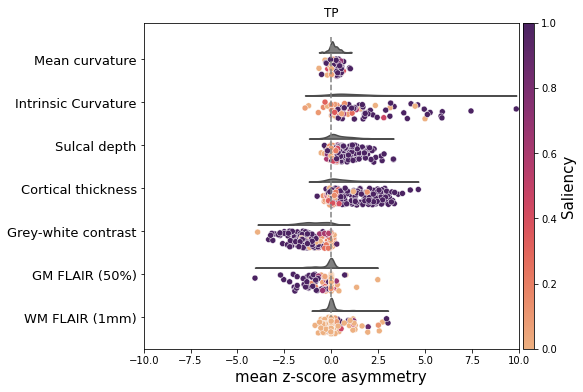

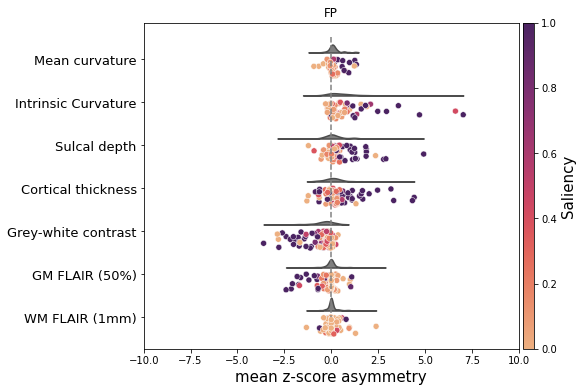

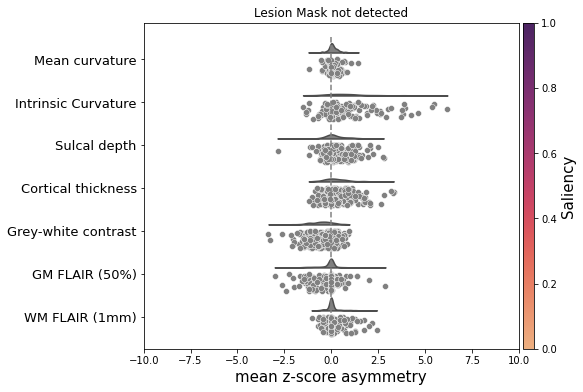

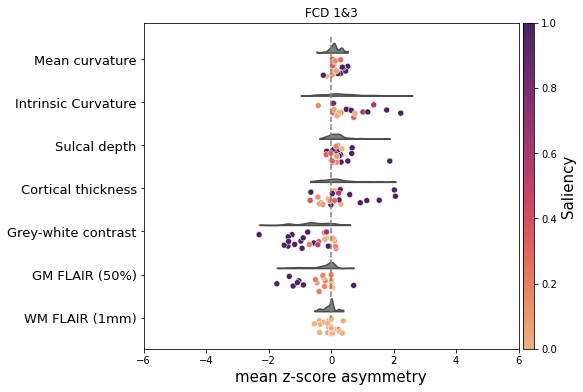

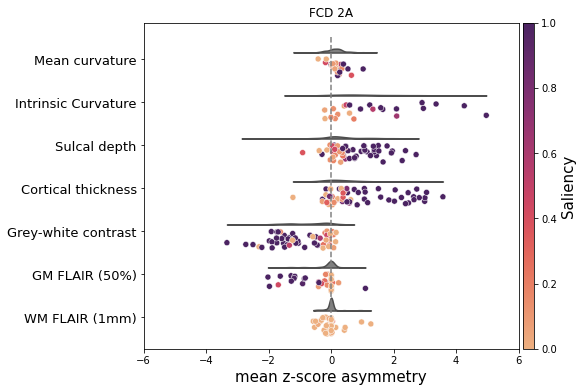

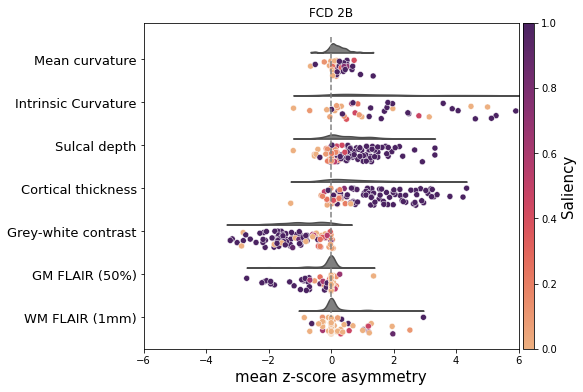

In [13]:

preprocessing = ".inter_z.asym.intra_z.combat"

for analysis in ['TP','FP','Lesion Mask not detected','FCD 1&3', 'FCD 2A', 'FCD 2B']:
    sub_df = df_salient[df_salient['preprocessing']==preprocessing]
    if analysis=='TP':
        sub_df = sub_df[(sub_df['detected']==True)].copy()
    elif analysis=='FP':
        sub_df = sub_df[(sub_df['detected']==False)].copy()
    elif analysis=='Lesion Mask not detected':
        sub_df = sub_df[(sub_df['cluster']=='lesion_mask')].copy()
    elif analysis=='FCD 1&3':
        sub_df = sub_df[(sub_df['histology']=='FCD_1')|(sub_df['histology']=='FCD_3')].copy()
    elif analysis=='FCD 2A':
        sub_df = sub_df[(sub_df['histology']=='FCD_2A')].copy()
    elif analysis=='FCD 2B':
        sub_df = sub_df[(sub_df['histology']=='FCD_2B')].copy()
    
    else:
        pass
    
    cmap = sns.color_palette("flare", as_cmap=True)


    f, ax = plt.subplots(figsize=(8, 6))
    ax=pt.half_violinplot( x = "feature_mean"  , y = "feature", order=base_feature_sets, data = sub_df, bw = .2, cut = 0.,
                        scale = "area", color = 'grey', width = .6, inner = None)
    sub_df['y']=[base_feature_sets.index(x)-0.1 for x in sub_df['feature']]
    sub_df['y_jitter']=sub_df['y']+np.random.uniform(low=0.1, high=0.5, size=(len(sub_df['y'])))
    if 'Lesion Mask' in analysis:
        scatter=sns.scatterplot(x ="feature_mean"  , y = "y_jitter", data = sub_df, color = 'grey')
    else: 
        scatter=sns.scatterplot(x ="feature_mean"  , y = "y_jitter", data = sub_df, hue="saliency",  hue_norm=(0,1),
                    palette=cmap)
        scatter.legend_.remove()
    ax.plot([0,0], [-0.5,len(base_feature_sets)-1], '--', color='grey', )

    

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])  
    cbar = plt.colorbar(sm, ax=ax, aspect=30, pad=0.01)
    cbar.set_label('Saliency', fontsize=15)

    new_y_ticks = [feature_names_sets[x] for x in base_feature_sets ] 
    ax.set_yticklabels(new_y_ticks, fontsize=13)

    ax.set_xlabel('mean z-score asymmetry', fontsize=15)
    ax.set_ylabel('',)
    if 'FCD' in analysis:
        ax.set_xlim([-6,6])
    else:
        ax.set_xlim([-10,10])
    plt.title(analysis)
    plt.show()
